
# Testing for holonomic behaviour

Given a set of motion trajectories, how can we determine if the motion is holonomic or not?


In [1]:

# Get imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Request high dpi, inline figures
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200


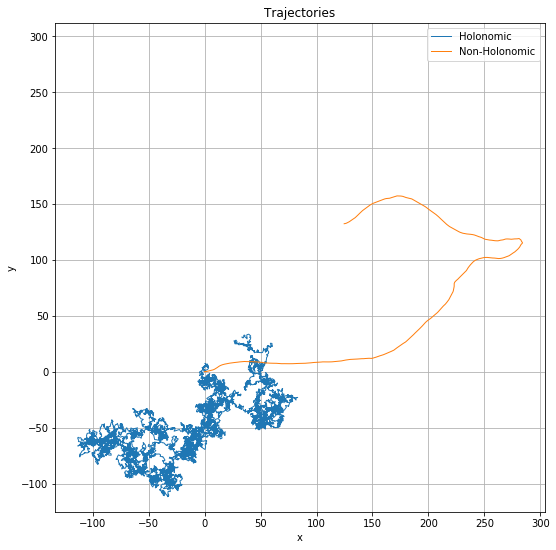

In [2]:

# Generate sample data

def get_holonomic_traj(num_steps=10000):
    """Generate a holonomic trajectory (a random walk)"""
    traj = np.array([[0, 0]])
    for t in range(num_steps):
        s = traj[-1, :]
        traj = np.vstack((traj, s + np.random.normal(size=2)))
    return traj

def get_nonholonomic_traj(num_steps=10000):
    """Generate a non-holonomic dataset (a biased random walk)"""
    traj = np.array([[0, 0]])
    v = np.array([[0, 0]], dtype=float)
    a = np.array([[0, 0]], dtype=float)
    for t in range(num_steps):
        s = traj[-1, :]
        a = np.random.normal(size=2, scale=0.001)
        v += a
        traj = np.vstack((traj, s + v))
        
    return traj

t_hol = get_holonomic_traj()
t_nonhol = get_nonholonomic_traj()

# Visualise trajectories
plt.figure(figsize=(9, 9))
plt.plot(t_hol[:, 0], t_hol[:, 1], '-', lw=1, label='Holonomic')
plt.plot(t_nonhol[:, 0], t_nonhol[:, 1], '-', lw=1, label='Non-Holonomic')
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectories")
plt.axis("square")
plt.show()
plt.close()



One test is to look at the distribution of angles between subsequent velocity vectors;


<Figure size 648x648 with 0 Axes>

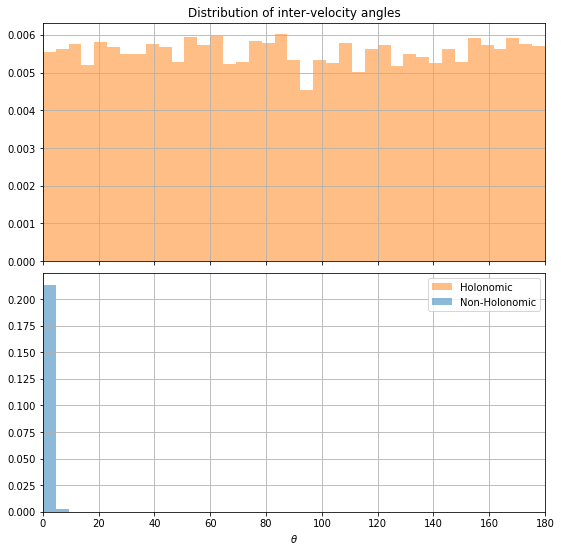

In [3]:

# Get inter-velocity angle vectors

# Lambda to get inter-velocity angles
theta = lambda v: np.arccos(
    np.diag(v[:-1] @ v[1:].T) /
    (np.linalg.norm(v[:-1], axis=1) * np.linalg.norm(v[1:], axis=1))
)

theta_hol = theta(np.diff(t_hol, axis=0))
theta_nonhol = theta(np.diff(t_nonhol, axis=0))

# Plat angle distributions

plt.figure(figsize=(9, 9))
fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True, figsize=(9, 9), gridspec_kw=dict(hspace=0.05))
ax1.set_title("Distribution of inter-velocity angles")
h1 = ax1.hist(
    np.rad2deg(theta_hol),
    bins=np.linspace(0, 180, 40),
    density=True,
    alpha=0.5,
    color='C1',
    label='Holonomic'
)
ax1.grid()
ax1.set_xlim((0, 180))
h2 = ax2.hist(
    np.rad2deg(theta_nonhol),
    bins=np.linspace(0, 180, 40),
    density=True,
    alpha=0.5,
    color='C0',
    label='Non-Holonomic'
)
ax2.grid()
ax2.set_xlabel(r"$\theta$")
ax2.legend(handles=[h1[2][0], h2[2][0]])
plt.show()



The second histogram is highly skewed (it appears log-normal), indicating that the motion corresponding to that distribution is not holonomic.
We numerically evaluate  the quality of a lognormal fit using `scipy.stats.lognorm.fit()` etc.
